# Ejercicio 2
Contenido del dataset: Resumen: Datos experimentales utilizados para la clasificación binaria (ocupación de la habitación) de temperatura, humedad, luz y CO2. La ocupación real se obtuvo a partir de imágenes con marca de tiempo que se tomaron cada minuto.
El ejercicio consiste obtener un modelo de clasificación para clasificar en si está ocupada (clase positiva) o no lo está, usando SVM y optimizando con  rejilla (GridSearchCV) los hiperparámetros C y kernel.
El dataset está en formato de texto, pero se puede cargar como archivo csv, y contiene un conjunto de entrenamiento (datatraining.txt) dos conjuntos de test (datatest.txt y datatest2.txt) aunque vamos a usar solo el primero (datatest.txt). Contiene 6 atributos y la clase. Como el primero es la fecha y hora habría que eliminarlo. Los atributos son: fecha, temperatura, humedad, iluminación, CO2, ratio de humedad y etiqueta/clase
*   URL: https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+#
*   URL Dataset:https://archive.ics.uci.edu/ml/machine-learning-databases/00357/occupancy_data.zip

**Tomando como base el ejemplo6 de los suministrados en clase (apartado de rejilla con SVC)** implementar un clasificador basado en el SVM No lineal (SVC)  que contenga los siguientes apartados:
*   Uso de StandardScaler en el preprocesamiento para escalar los datos.
*   Una vez escalados los datos, definir la rejilla con los siguientes parámetros: 'C':[0.01,0.1,1, 2], 'kernel': ["linear", "poly", "rbf", "sigmoid"]
*   Entrenar el modelo y mostrar los mejores parámetros.
*   Para los mejores parámetros obtener matriz de confusión en texto y gráfica. Así como el accuracy, precisión, recall y f1.
*   Implementar un clasificador basado en un árbol de decisión, a partir de los datos ya preprocesados para el clasificador anterior, usando una rejilla con los siguientes parámetros: 'max_leaf_nodes': list(range(3, 30)), 'min_samples_split': [2, 3, 4, 5, 6] y obtenerPara los mejores parámetros obtener matriz de confusión en texto y gráfica. Así como el accuracy, precisión, recall y f1.
*   Escribir al final una celda de texto resumiendo los pasos que se han dado y los resultados obtenidos.


In [88]:
import pandas as pd

In [131]:
%%bash
wget https://archive.ics.uci.edu/ml/machine-learning-databases/00357/occupancy_data.zip
unzip occupancy_data.zip

Archive:  occupancy_data.zip


--2022-12-25 18:41:17--  https://archive.ics.uci.edu/ml/machine-learning-databases/00357/occupancy_data.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 335713 (328K) [application/x-httpd-php]
Saving to: ‘occupancy_data.zip.7’

     0K .......... .......... .......... .......... .......... 15% 2.44M 0s
    50K .......... .......... .......... .......... .......... 30% 5.19M 0s
   100K .......... .......... .......... .......... .......... 45% 5.31M 0s
   150K .......... .......... .......... .......... .......... 61%  142M 0s
   200K .......... .......... .......... .......... .......... 76%  108M 0s
   250K .......... .......... .......... .......... .......... 91% 5.71M 0s
   300K .......... .......... .......                         100%  127M=0.05s

2022-12-25 18:41:17 (6.65 MB/s) - ‘occupancy_data.zip.7’ saved [33

CalledProcessError: ignored

In [92]:
occupancy_train = pd.read_csv("/content/datatraining.txt")

In [95]:
occupancy_train.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [96]:
occupancy_test = pd.read_csv("/content/datatest.txt")

In [97]:
occupancy_test.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [98]:
#Como nos suministran los datos separados en test y entrenamiento, no hay que hacer partición del dataset en test y entrenamiento, como en el ejercicio 1
#Ahora habría la fecha de los conjuntos test y entrenamiento.
#Después habría que separar en los conjuntos de entrenamiento y test, los datos de las etiquetas/clases
#Para estas dos acciones, ver el código suministrado del ejercicio 1.
#Así se obtendrán los conjuntos X_train, X_test, y_train, y_test

In [99]:
occupancy_train = occupancy_train.drop('date', axis=1)
occupancy_test = occupancy_test.drop('date', axis=1)

In [100]:
occupancy_train.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,23.18,27.2720,426.0,721.25,0.004793,1
2,23.15,27.2675,429.5,714.00,0.004783,1
3,23.15,27.2450,426.0,713.50,0.004779,1
4,23.15,27.2000,426.0,708.25,0.004772,1
5,23.10,27.2000,426.0,704.50,0.004757,1


In [101]:
occupancy_test.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,23.7000,26.272,585.200000,749.200000,0.004764,1
141,23.7180,26.290,578.400000,760.400000,0.004773,1
142,23.7300,26.230,572.666667,769.666667,0.004765,1
143,23.7225,26.125,493.750000,774.750000,0.004744,1
144,23.7540,26.200,488.600000,779.000000,0.004767,1


In [102]:
from sklearn.preprocessing import StandardScaler #Para escalar los datos

In [120]:
X_train = occupancy_train[["Temperature",	"Humidity",	"Light",	"CO2",	"HumidityRatio"]]
X_test = occupancy_train[["Occupancy"]]
X_test = X_test.values.ravel()

In [104]:
X_train.head()

,Temperature,Humidity,Light,CO2,HumidityRatio
1,23.18,27.2720,426.0,721.25,0.004793
2,23.15,27.2675,429.5,714.00,0.004783
3,23.15,27.2450,426.0,713.50,0.004779
4,23.15,27.2000,426.0,708.25,0.004772
5,23.10,27.2000,426.0,704.50,0.004757


In [105]:
X_test.head()

,Occupancy
1,1
2,1
3,1
4,1
5,1


In [119]:
y_train = occupancy_test[["Temperature",	"Humidity",	"Light",	"CO2",	"HumidityRatio"]]
y_test = occupancy_test[["Occupancy"]]
y_test = y_test.values.ravel()

In [107]:
y_train.head()

,Temperature,Humidity,Light,CO2,HumidityRatio
140,23.7000,26.272,585.200000,749.200000,0.004764
141,23.7180,26.290,578.400000,760.400000,0.004773
142,23.7300,26.230,572.666667,769.666667,0.004765
143,23.7225,26.125,493.750000,774.750000,0.004744
144,23.7540,26.200,488.600000,779.000000,0.004767


In [108]:
y_test.head()

,Occupancy
140,1
141,1
142,1
143,1
144,1


In [109]:
#Una vez obtenidos los conjuntos de test y de entrenamiento, hay que aplicar el escalado con StandarScaler (no vamos a usar pipe).
#Para aplicarlo por ejemplo en X_train --> X_train = StandardScaler().fit_transform(X_train)

In [110]:
object = StandardScaler()
X_train = object.fit_transform(X_train)

In [111]:
object = StandardScaler()
y_train = object.fit_transform(y_train)

Tomando como base el ejemplo6 de los suministrados en clase (apartado de rejilla con SVC) implementar un clasificador basado en el SVM No lineal (SVC) que contenga los siguientes apartados:

Uso de StandardScaler en el preprocesamiento para escalar los datos.
Una vez escalados los datos, definir la rejilla con los siguientes parámetros: 'C':[0.01,0.1,1, 2], 'kernel': ["linear", "poly", "rbf", "sigmoid"]
Entrenar el modelo y mostrar los mejores parámetros.
Para los mejores parámetros obtener matriz de confusión en texto y gráfica. Así como el accuracy, precisión, recall y f1.
Implementar un clasificador basado en un árbol de decisión, a partir de los datos ya preprocesados para el clasificador anterior, usando una rejilla con los siguientes parámetros: 'max_leaf_nodes': list(range(3, 30)), 'min_samples_split': [2, 3, 4, 5, 6] y obtenerPara los mejores parámetros obtener matriz de confusión en texto y gráfica. Así como el accuracy, precisión, recall y f1.
Escribir al final una celda de texto resumiendo los pasos que se han dado y los resultados obtenidos.

In [121]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

params = {'C':[0.01, 0.1, 1, 2], 'kernel': ["linear", "poly", "rbf", "sigmoid"]} #Variamos el parámetro de regularización y el kernel
grid_search_cv = GridSearchCV(SVC(random_state=42), params, verbose=2, cv=3)



In [122]:
grid_search_cv.fit(X_train, X_test)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END ..............................C=0.01, kernel=linear; total time=   0.3s
[CV] END ..............................C=0.01, kernel=linear; total time=   1.2s
[CV] END ..............................C=0.01, kernel=linear; total time=   0.6s
[CV] END ................................C=0.01, kernel=poly; total time=   0.1s
[CV] END ................................C=0.01, kernel=poly; total time=   0.1s
[CV] END ................................C=0.01, kernel=poly; total time=   0.2s
[CV] END .................................C=0.01, kernel=rbf; total time=   0.5s
[CV] END .................................C=0.01, kernel=rbf; total time=   0.5s
[CV] END .................................C=0.01, kernel=rbf; total time=   0.4s
[CV] END .............................C=0.01, kernel=sigmoid; total time=   1.4s
[CV] END .............................C=0.01, kernel=sigmoid; total time=   1.4s
[CV] END .............................C=0.01, ke

GridSearchCV(cv=3, estimator=SVC(random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 2],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=2)

In [124]:
grid_search_cv.best_estimator_

SVC(C=0.1, kernel='linear', random_state=42)

In [123]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay


In [125]:
y_pred = grid_search_cv.predict(y_train)
accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)

(0.9786116322701689,
 0.9472140762463344,
 0.9969135802469136,
 0.9714285714285715)

In [126]:
grid_search_cv.best_score_

0.9793700037954304

In [127]:
grid_search_cv.best_params_

{'C': 0.1, 'kernel': 'linear'}

In [128]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)


In [129]:
cm

array([[1639,   54],
       [   3,  969]])

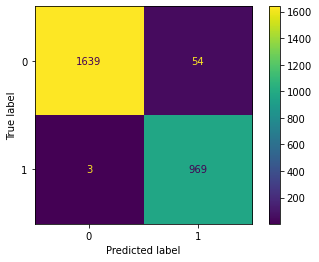

In [130]:
cm_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:
#Se replica el procedimiento para el clasificador basado en arbol de decision

In [132]:
params = {'max_leaf_nodes': list(range(3, 30)), 'min_samples_split': [2, 3, 4, 5, 6]}
#max_leaf_nodes: int, default=None. Define el número máximo de nodos hoja.Si no se ponde nada es ilimitado
#min_samples_split: int or float, default=2. El número mínimo de muestras requeridas para dividir un nodo interno:
    # Si es int, considere min_samples_split como el número mínimo.
    # Si es float, entonces min_samples_split es una fracción y ceil(min_samples_split * n_samples) es el número mínimo de muestras para cada división
    
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)



In [133]:
grid_search_cv.fit(X_train, X_test)

Fitting 3 folds for each of 135 candidates, totalling 405 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                            14, 15, 16, 17, 18, 19, 20, 21, 22,
                                            23, 24, 25, 26, 27, 28, 29],
                         'min_samples_split': [2, 3, 4, 5, 6]},
             verbose=1)

In [134]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=3, random_state=42)

In [135]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay


In [136]:
y_pred = grid_search_cv.predict(y_train)
accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)

(0.9782363977485928,
 0.9480392156862745,
 0.9948559670781894,
 0.9708835341365462)

In [137]:
grid_search_cv.best_score_

0.9758084515503587

In [138]:
grid_search_cv.best_params_

{'max_leaf_nodes': 3, 'min_samples_split': 2}

In [139]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)


In [140]:
cm

array([[1640,   53],
       [   5,  967]])

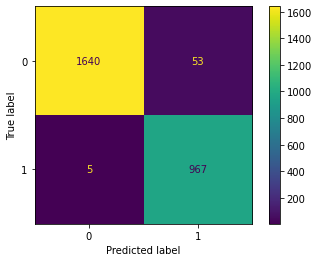

In [141]:
cm_display = ConfusionMatrixDisplay(cm).plot()

# **Resultados** 

\begin{array}{|c|c|} \hline
 & accuracy\_score & precision\_score & recall\_score & f1\_score \\ \hline
SVM & 0.9786 & 0.9472 & 0.9969 & 0.9714 \\ \hline
Arbol de Decision & 0.9782 &  0.9480 & 0.9948 & 0.9708 \\ \hline
\hline
\hline
\end{array}

Para la realización de este ejercicio, se ha seguido como ejemplo la práctica 6. Pero antes se realizo un procesamiento donde se eliminaba la columna date y se separaban los outputs de los inputs. Una vez se realizaba este proceso para cada dataset (test y train), se aplicaba el scaler en los conjuntos de entrenamiento.
Finalizado el proceso anterior, se realizaba el mismo procedimiento que en el ejercicio 6 donde se creaba la rejilla para cada clasificador y se realizaba el entrenamiento. Tras realizar el entrenamiento se comprueban los resultados del mejor modelo entrenado con el conjunto de test y se comprueban con los distintos tipos de mediciones de calidad del modelo los resultados obtenidos. Los resultados obtenidos son los que se pueden apreciar en la tabla.

La mejor combinación para SVM es:
{'C': 0.1, 'kernel': 'linear'}

La mejor combinación para árbol de decisión es:
{'max_leaf_nodes': 3, 'min_samples_split': 2}

Si comparamos los resultados generados por ambos modelos, son muy similares de tal forma que cualquiera de ellos sería bastante válido para este dataset.